In [290]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split

# *Phase 1: Exploratory Data Analysis (EDA) & Data Quality Report*

In [292]:
data_path = "C:/Users/Dell/Downloads/hotel_bookings.csv"
df = pd.read_csv(data_path)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [293]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [295]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [296]:
df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [297]:
missing_summary = df.isnull().sum()
missing_percentage = (df.isnull().mean() * 100).round(2)
print("Missing values per column:")
print(pd.DataFrame({
    "Missing Values": missing_summary,
    "Percentage": missing_percentage
}).sort_values(by="Percentage", ascending=False))

Missing values per column:
                                Missing Values  Percentage
company                                 112593       94.31
agent                                    16340       13.69
country                                    488        0.41
hotel                                        0        0.00
arrival_date_month                           0        0.00
arrival_date_week_number                     0        0.00
lead_time                                    0        0.00
is_canceled                                  0        0.00
stays_in_weekend_nights                      0        0.00
stays_in_week_nights                         0        0.00
children                                     4        0.00
adults                                       0        0.00
babies                                       0        0.00
meal                                         0        0.00
arrival_date_day_of_month                    0        0.00
arrival_date_year            

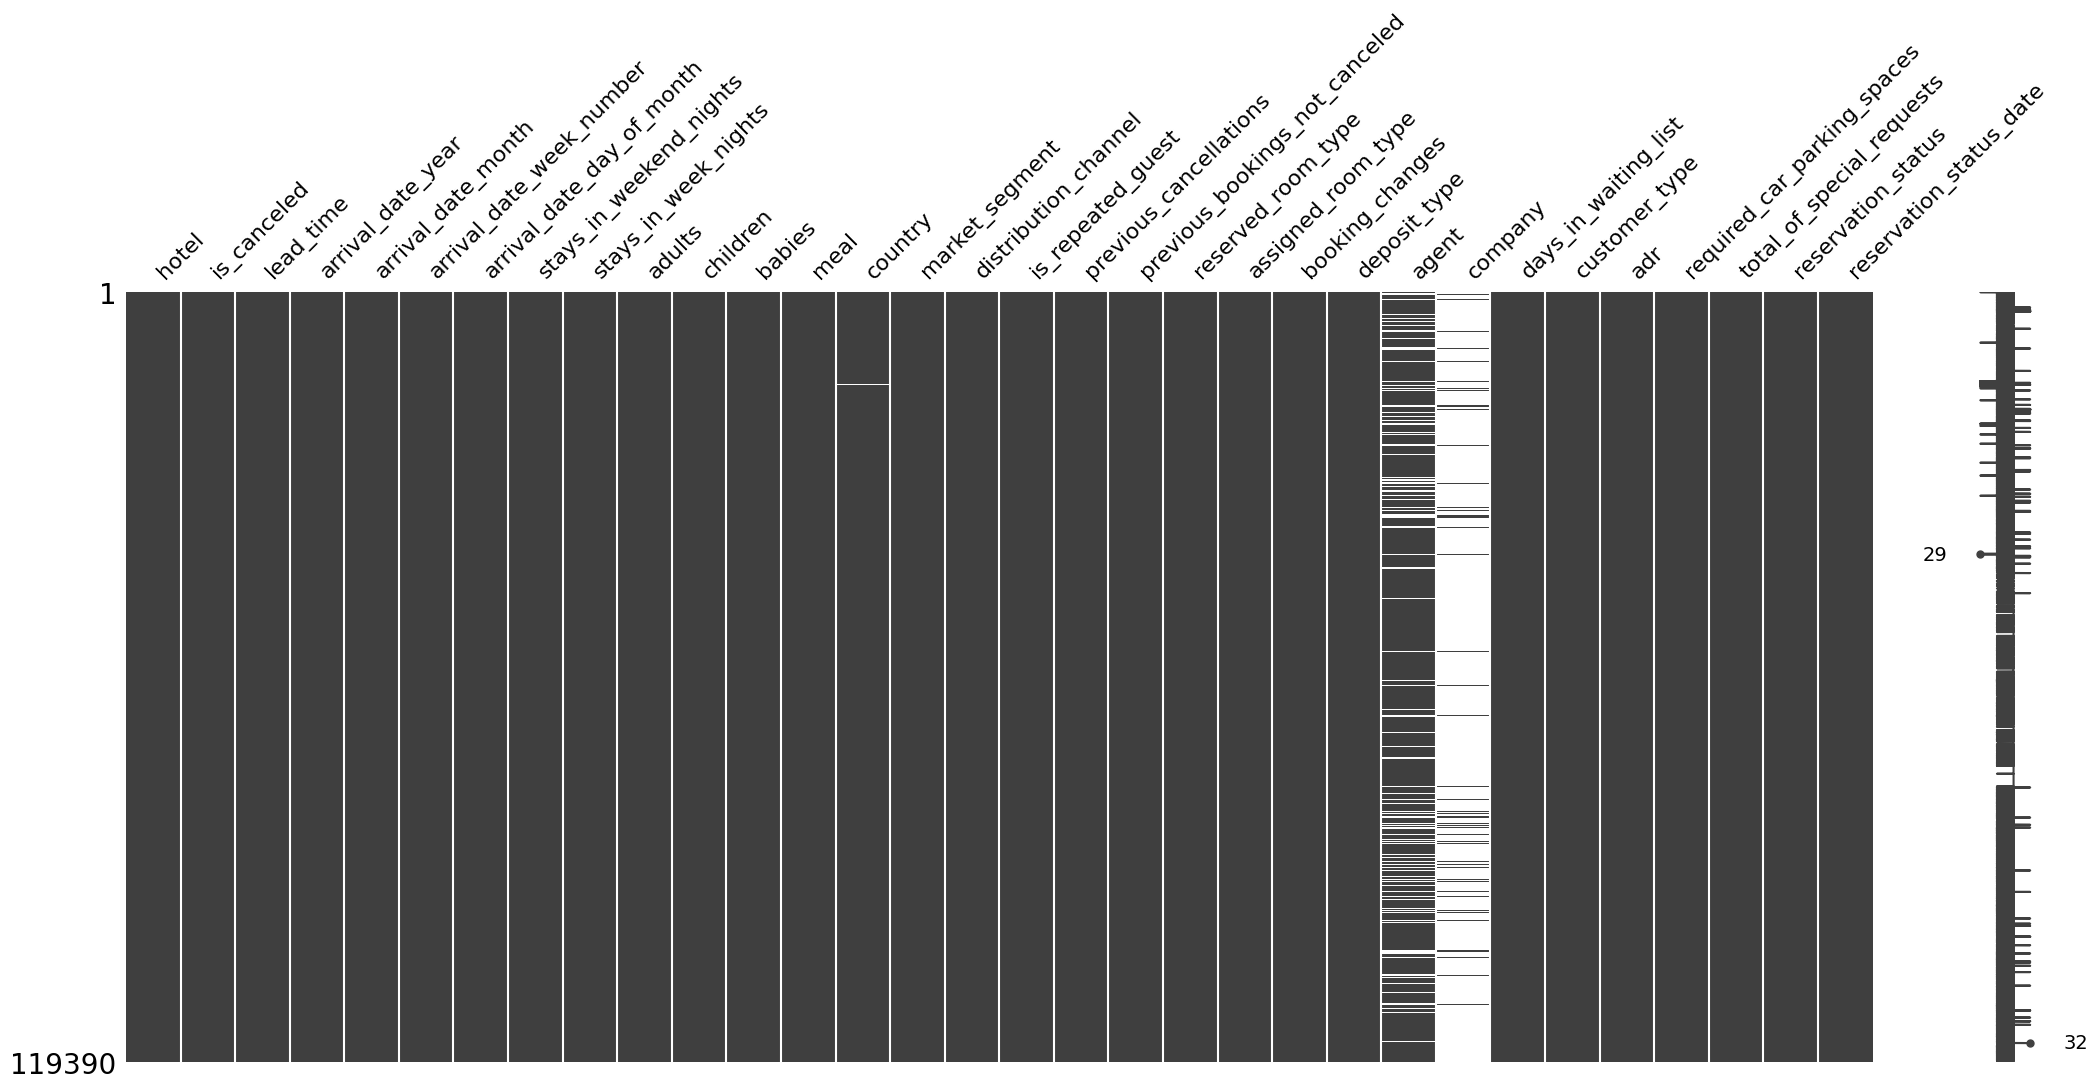

In [298]:
msno.matrix(df)
plt.show()

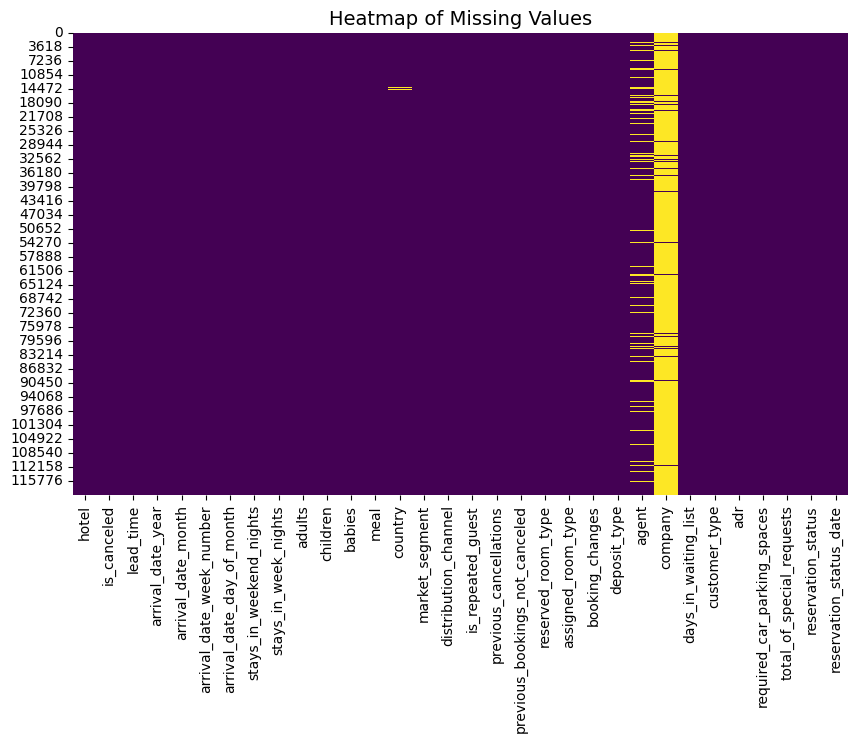

In [299]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values", fontsize=14)
plt.show()

In [300]:
df.duplicated().sum()

np.int64(31994)

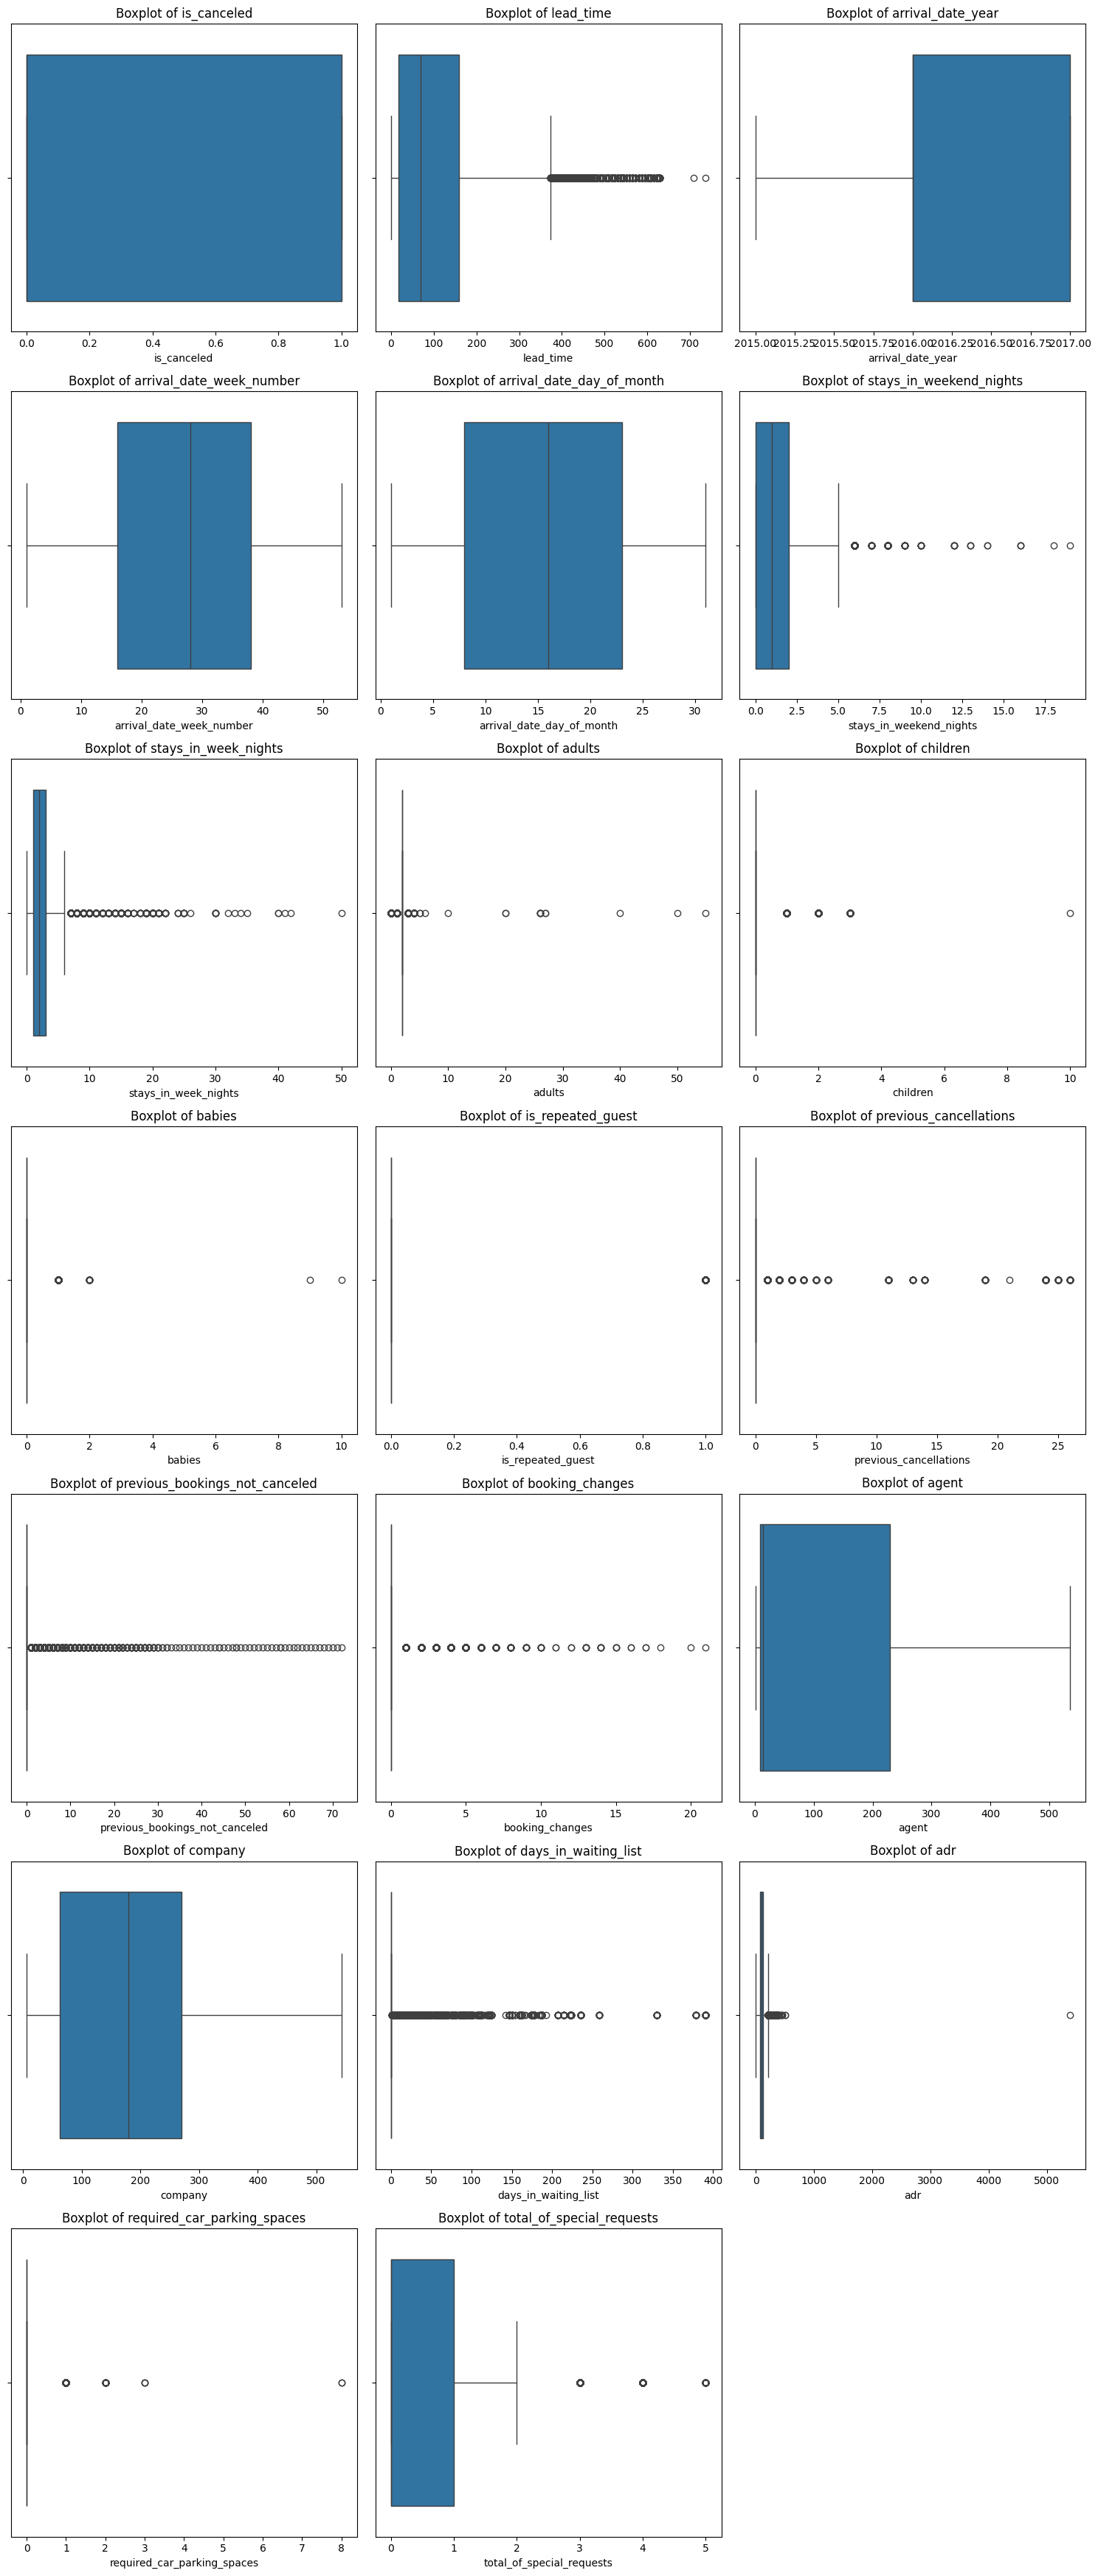

In [301]:
def plot_boxplots(df, n_cols=3):
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    num_cols = [col for col in num_cols if df[col].dropna().shape[0] > 0]
    
    n_rows = (len(num_cols) + n_cols - 1) // n_cols 
    
    plt.figure(figsize=(15, 5 * n_rows))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.boxplot(x=df[col].dropna())
        plt.title(f"Boxplot of {col}")
    
    plt.tight_layout()
    plt.show()

plot_boxplots(df)

# *Phase 2: Data Cleaning*

In [302]:
# Handle Missing Values
if 'company' in df.columns:
    df.drop('company', axis=1, inplace=True)

cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

print("Remaining missing values:")
print(df.isnull().sum()[df.isnull().sum() > 0])


Remaining missing values:
Series([], dtype: int64)


C:\Users\Dell\AppData\Local\Temp\ipykernel_13916\3533659083.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13916\3533659083.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

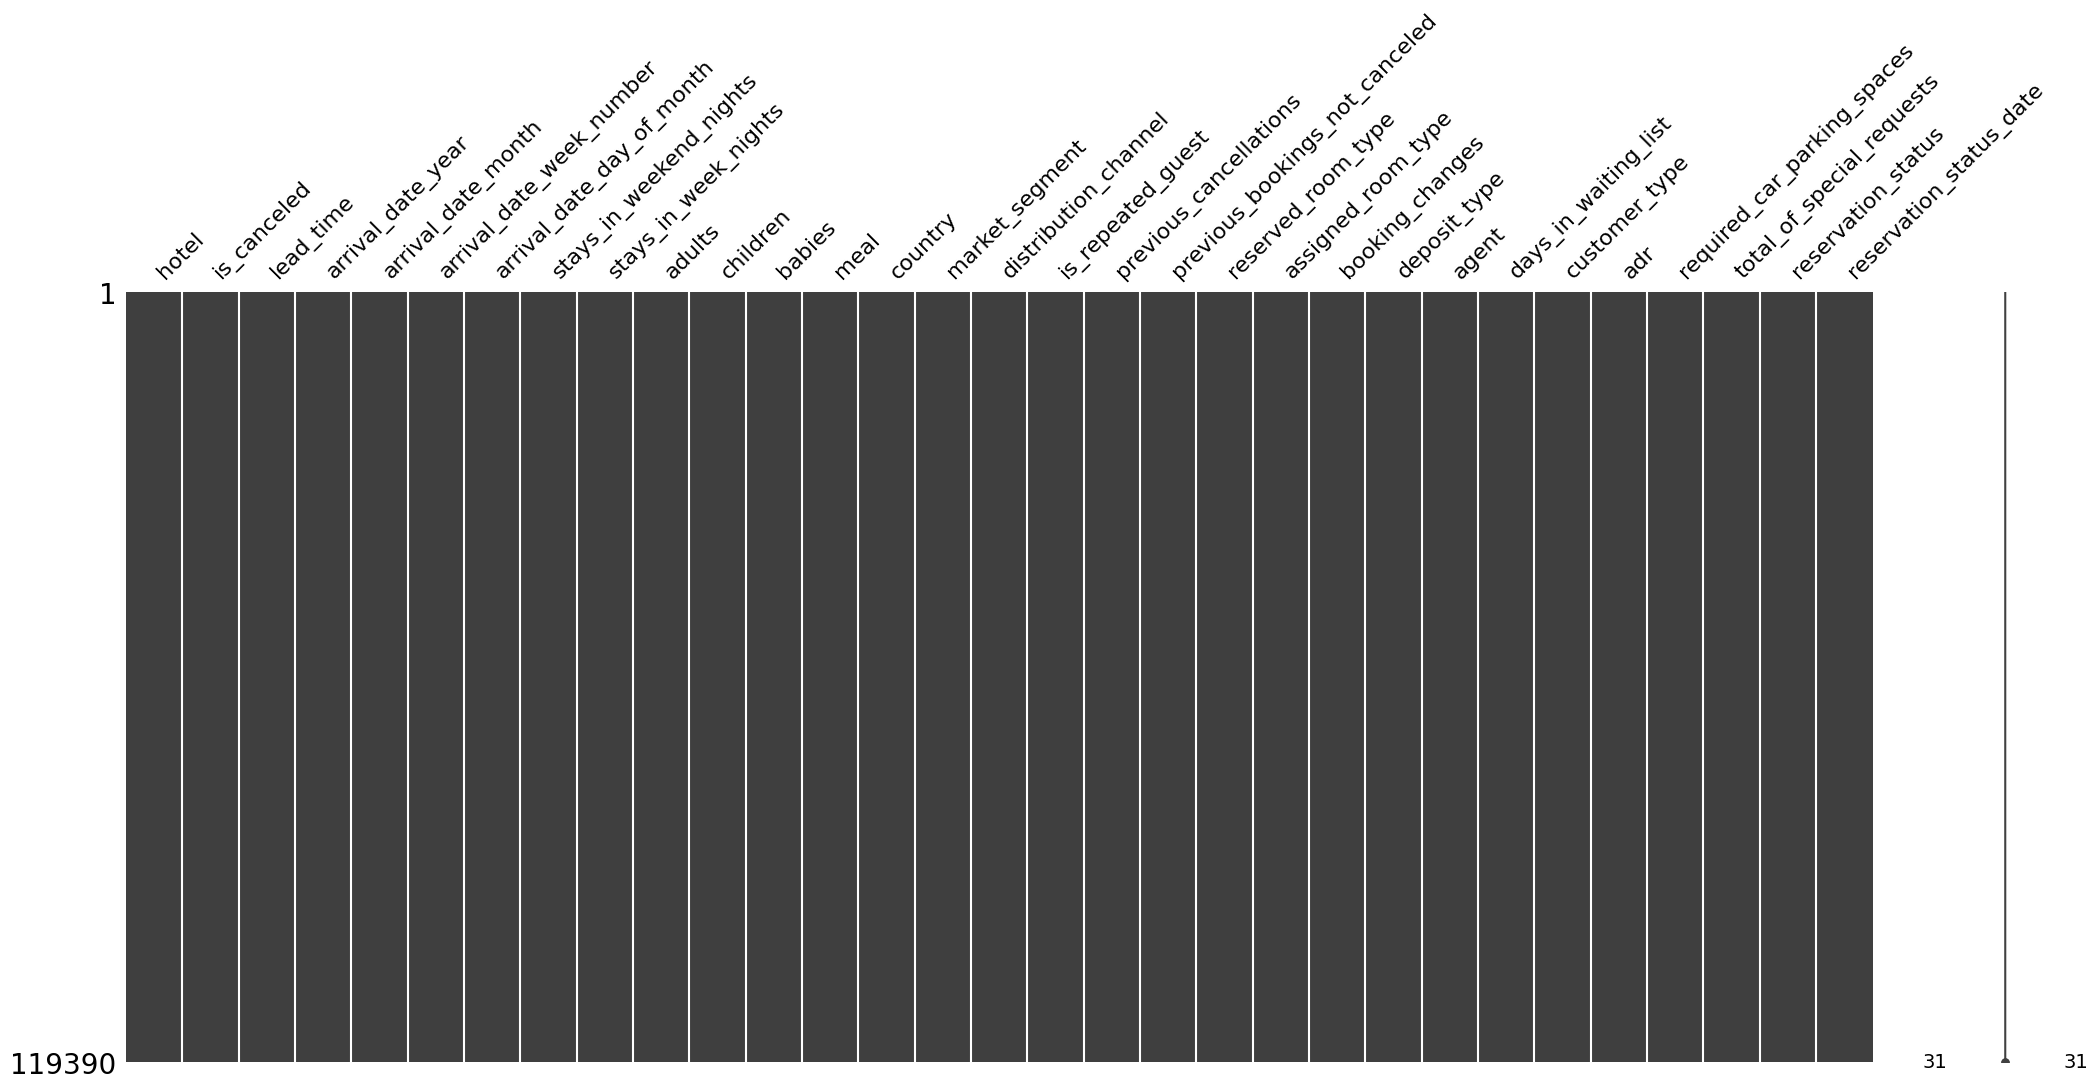

In [303]:
msno.matrix(df)
plt.show()

In [304]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [305]:
# Handle Outliers by Capping
def outliers_handling(x, p1=0.25 , p2=0.75):
    q1 = x.quantile(p1)
    q3 = x.quantile(p2)
    iqr = q3 - q1
    min_limit = q1 - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    return x.clip(lower=min_limit, upper=max_limit)

for col in num_cols:
    df[col] = outliers_handling(df[col])

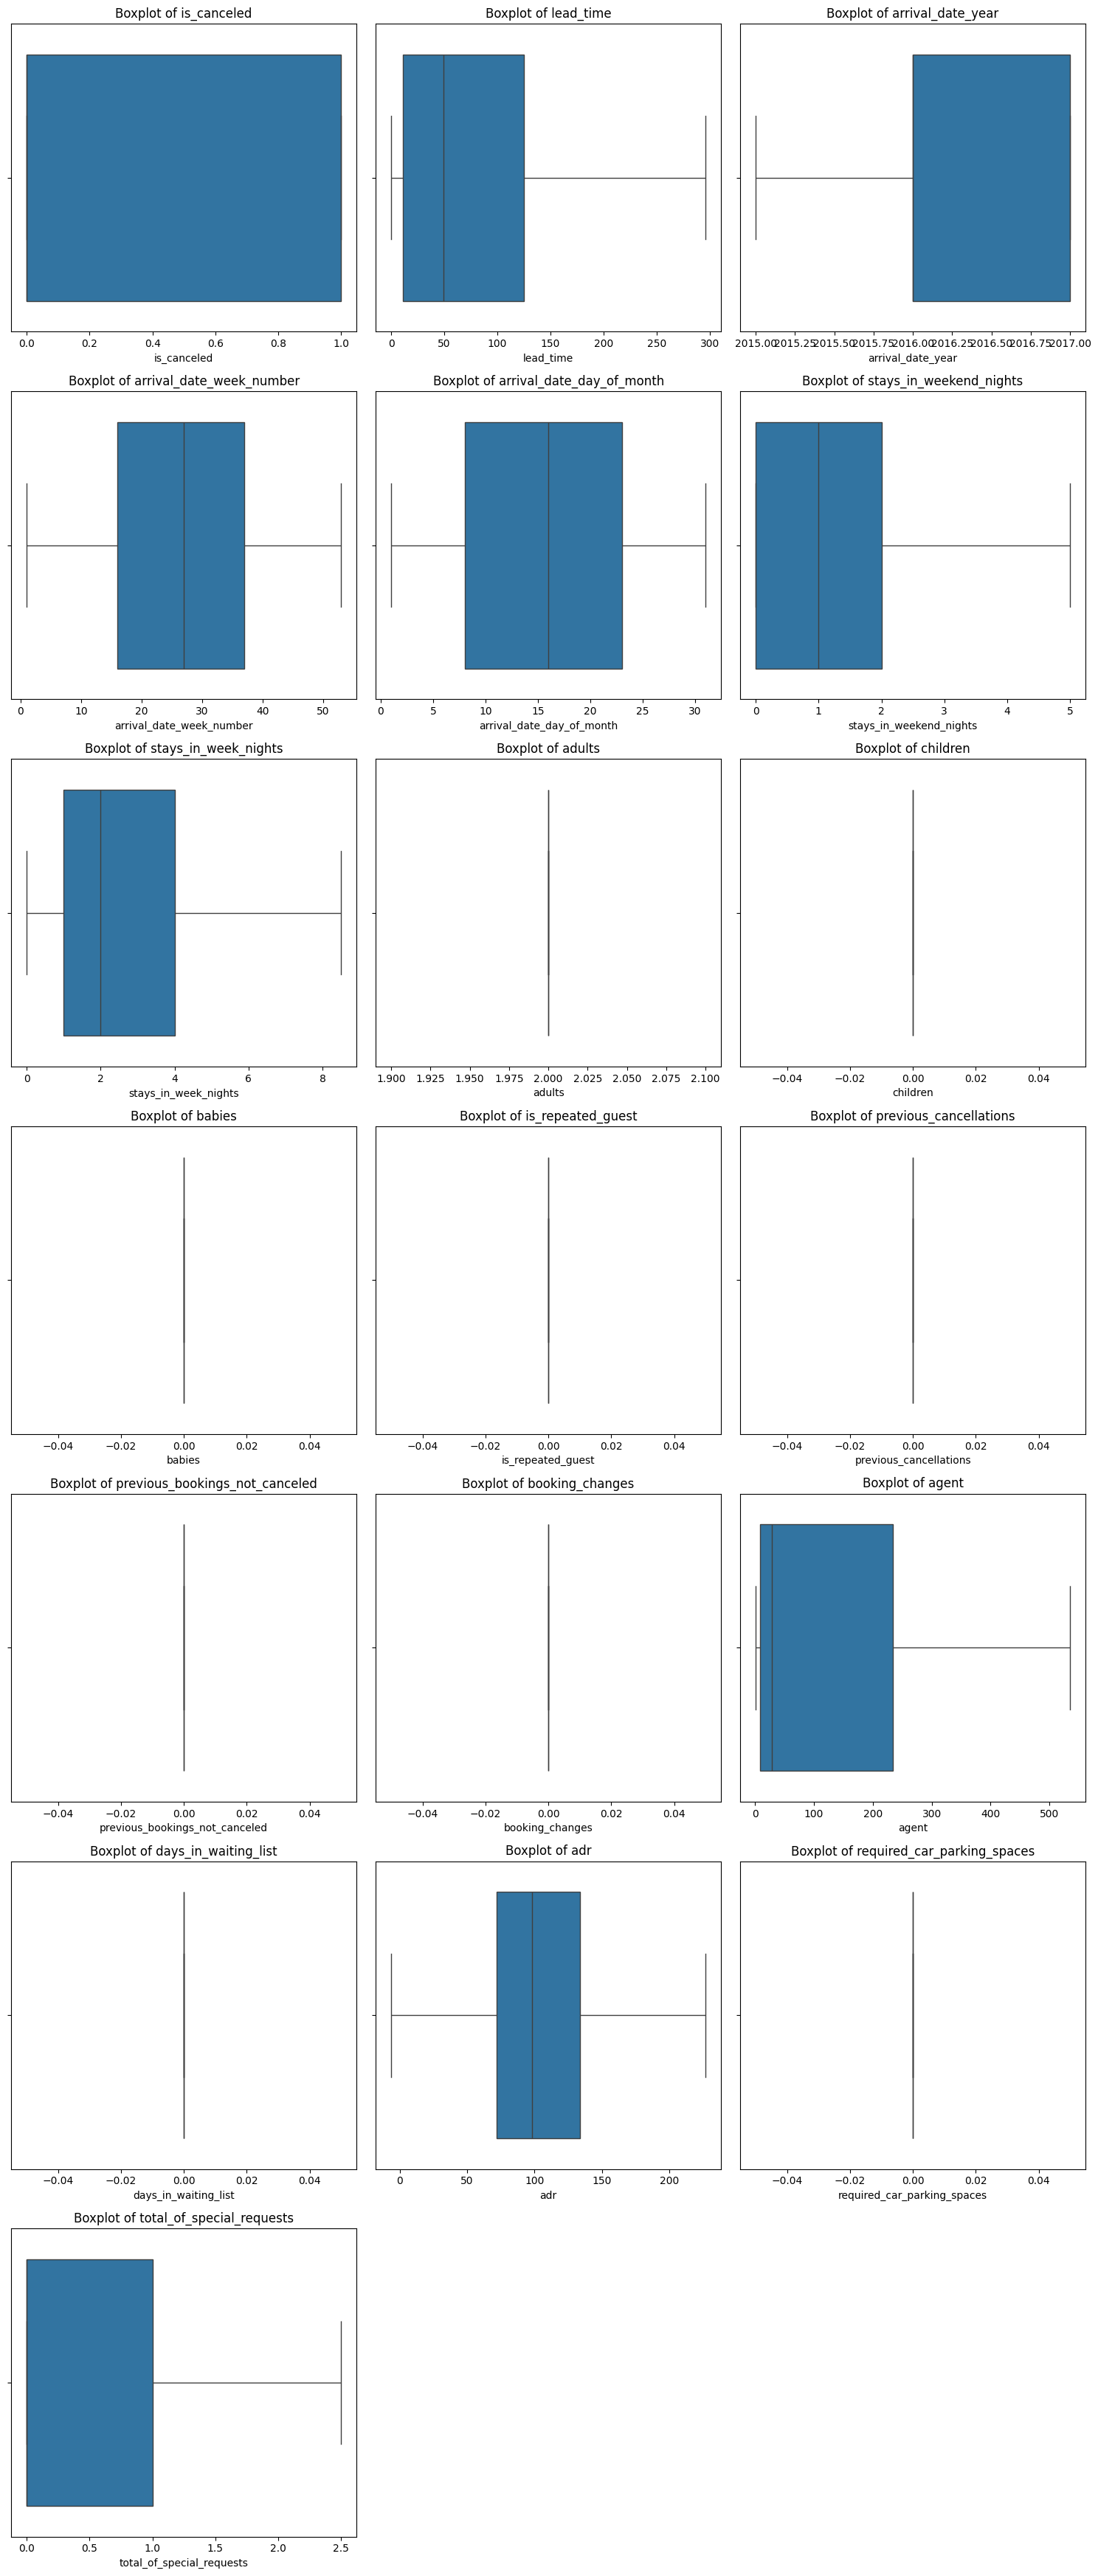

In [306]:
plot_boxplots(df)

# *Phase 3: Feature Engineering & Preprocessing*

In [ ]:
def preprocess_data(df):
    df['total_guests'] = df['adults'] + df['children'].fillna(0) + df['babies'].fillna(0)
    df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
    
    df['is_family'] = ((df['children'].fillna(0) > 0) | (df['babies'].fillna(0) > 0)).astype(int)
    
    df = df.drop(['reservation_status', 'reservation_status_date'], axis=1, errors='ignore')
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    low_cardinality_cols = []
    high_cardinality_cols = []
    
    for col in categorical_cols:
        if df[col].nunique() <= 10: 
            low_cardinality_cols.append(col)
        else:
            high_cardinality_cols.append(col)
    
    # One-Hot Encoding for low-cardinality categories
    df_encoded = pd.get_dummies(df, columns=low_cardinality_cols, drop_first=True)
    
    # Frequency encoding for high-cardinality categories
    for col in high_cardinality_cols:
        if col in df_encoded.columns: 
            freq_encoding = df_encoded[col].value_counts(normalize=True)
            threshold = 0.01 
            infrequent_categories = freq_encoding[freq_encoding < threshold].index
            df_encoded[col] = df_encoded[col].apply(lambda x: 'Other' if x in infrequent_categories else x)
            
            freq_map = df_encoded[col].value_counts(normalize=True).to_dict()
            df_encoded[f'{col}_freq_encoded'] = df_encoded[col].map(freq_map)
            
            df_encoded = df_encoded.drop(col, axis=1)
    
    bool_cols = df_encoded.select_dtypes(include=['bool']).columns
    for col in bool_cols:
        df_encoded[col] = df_encoded[col].astype(int)
    
    object_cols = df_encoded.select_dtypes(include=['object']).columns
    for col in object_cols:
        df_encoded[col] = df_encoded[col].astype('category').cat.codes
    
    df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')
    
    df_encoded = df_encoded.fillna(0)
    
    return df_encoded

cleaned_data = preprocess_data(df.copy())

In [308]:
cleaned_data.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_L,reserved_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,arrival_date_month_freq_encoded,country_freq_encoded,assigned_room_type_freq_encoded
0,0,296,2015,27,1,0,0.0,2,0.0,0,...,0,0,0,0,0,1,0,0.115085,0.319126,0.024780
1,0,296,2015,27,1,0,0.0,2,0.0,0,...,0,0,0,0,0,1,0,0.115085,0.319126,0.024780
2,0,7,2015,27,1,0,1.0,2,0.0,0,...,0,0,0,0,0,1,0,0.115085,0.119400,0.024780
3,0,13,2015,27,1,0,1.0,2,0.0,0,...,0,0,0,0,0,1,0,0.115085,0.119400,0.529942
4,0,14,2015,27,1,0,2.0,2,0.0,0,...,0,0,0,0,0,1,0,0.115085,0.119400,0.529942


In [309]:
print("Data types after preprocessing:")
print(cleaned_data.dtypes.value_counts())

X = cleaned_data.drop('is_canceled', axis=1) 
y = cleaned_data['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Data types after preprocessing:
int64      45
float64    10
Name: count, dtype: int64

Training set shape: (69896, 54)
Testing set shape: (17474, 54)
